# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [41]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'FaixaLatitude',

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
sinasc_raw['FaixaLatitude'] = pd.cut(sinasc_raw['munResLat'],
                                     bins=[-float('inf'), -10.5, float('inf')],
                                     labels=['Abaixo de -10.5', 'Acima de -10.5'])


In [4]:
variaveis_numericas = ['PESO', 'IDADEMAE']
sinasc_raw.groupby('FaixaLatitude')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

PESO                                              \
                      sum         mean  min   max  median         std   
FaixaLatitude                                                           
Abaixo de -10.5  42098594  3240.098053  258  5985  3270.0  531.815114   
Acima de -10.5   45555148  3246.055864  295  5190  3275.0  556.487709   

                               IDADEMAE                                      \
                           var      sum       mean min max median       std   
FaixaLatitude                                                                 
Abaixo de -10.5  282827.315354   340143  26.178943  12  53   26.0  6.320385   
Acima de -10.5   309678.570242   365094  26.014964  11  52   25.0  6.447663   

                            
                       var  
FaixaLatitude               
Abaixo de -10.5  39.947272  
Acima de -10.5   41.572355

In [5]:
# Informações organizadas

df_1 = sinasc_raw.groupby('FaixaLatitude')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
df_1.columns = [f'{var}_({estatistica})' for var in variaveis_numericas for estatistica in ['Soma', 'Média', 'Min', 'Max', 'Mediana', 'Desvio Padrão', 'Variância']]
print(df_1)

                 PESO_(Soma)  PESO_(Média)  PESO_(Min)  PESO_(Max)  \
FaixaLatitude                                                        
Abaixo de -10.5     42098594   3240.098053         258        5985   
Acima de -10.5      45555148   3246.055864         295        5190   

                 PESO_(Mediana)  PESO_(Desvio Padrão)  PESO_(Variância)  \
FaixaLatitude                                                             
Abaixo de -10.5          3270.0            531.815114     282827.315354   
Acima de -10.5           3275.0            556.487709     309678.570242   

                 IDADEMAE_(Soma)  IDADEMAE_(Média)  IDADEMAE_(Min)  \
FaixaLatitude                                                        
Abaixo de -10.5           340143         26.178943              12   
Acima de -10.5            365094         26.014964              11   

                 IDADEMAE_(Max)  IDADEMAE_(Mediana)  IDADEMAE_(Desvio Padrão)  \
FaixaLatitude                                           

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
sinasc_raw['FaixaArea'] = pd.cut(sinasc_raw['munResArea'],
                                 bins=[-float('inf'), 3000, float('inf')],
                                 labels=['Abaixo de 3000', 'Acima de 3000'])

In [7]:
variaveis_numericas = ['QTDFILVIVO', 'QTDFILMORT']

df_2 = sinasc_raw.groupby('FaixaArea')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
df_2.columns = [f'{var}_({estatistica})' for var in variaveis_numericas for estatistica in ['Soma', 'Média', 'min', 'Max', 'Mediana', 'Desvio Padrão', 'Variância']]


In [8]:
print(df_2)


                QTDFILVIVO_(Soma)  QTDFILVIVO_(Média)  QTDFILVIVO_(min)  \
FaixaArea                                                                 
Abaixo de 3000             4773.0            0.924284               0.0   
Acima de 3000             22053.0            1.086890               0.0   

                QTDFILVIVO_(Max)  QTDFILVIVO_(Mediana)  \
FaixaArea                                                
Abaixo de 3000              30.0                   1.0   
Acima de 3000               14.0                   1.0   

                QTDFILVIVO_(Desvio Padrão)  QTDFILVIVO_(Variância)  \
FaixaArea                                                            
Abaixo de 3000                    1.075442                1.156575   
Acima de 3000                     1.191750                1.420268   

                QTDFILMORT_(Soma)  QTDFILMORT_(Média)  QTDFILMORT_(min)  \
FaixaArea                                                                 
Abaixo de 3000             1260.0  

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:
sinasc_raw['FaixaAltura'] = pd.cut(sinasc_raw['munResAlt'],
                                   bins=[-float('inf'), 500, 1000, float('inf')],
                                   labels=['Abaixo de 500', '500-1000', 'Acima de 1000'])


variaveis_numericas = ['APGAR1', 'APGAR5']
df_3 = sinasc_raw.groupby('FaixaAltura')[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

df_3.columns = [f'{var}_({estatistica})' for var in variaveis_numericas for estatistica in ['Soma', 'Média', 'Min', 'Max', 'Mediana', 'Desvio Padrão', 'Variância']]



In [10]:
print(df_3)

               APGAR1_(Soma)  APGAR1_(Média)  APGAR1_(Min)  APGAR1_(Max)  \
FaixaAltura                                                                
Abaixo de 500       206091.0        8.131105           0.0          10.0   
500-1000             13058.0        8.238486           0.0          10.0   
Acima de 1000            0.0             NaN           NaN           NaN   

               APGAR1_(Mediana)  APGAR1_(Desvio Padrão)  APGAR1_(Variância)  \
FaixaAltura                                                                   
Abaixo de 500               8.0                0.993038            0.986125   
500-1000                    8.0                0.838564            0.703190   
Acima de 1000               NaN                     NaN                 NaN   

               APGAR5_(Soma)  APGAR5_(Média)  APGAR5_(Min)  APGAR5_(Max)  \
FaixaAltura                                                                
Abaixo de 500       232742.0        9.184767           0.0          10.

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [11]:
sinasc_raw['munResNome'].unique()

array(["Alta Floresta D'Oeste", 'Alto Alegre dos Parecis',
       'Novo Horizonte do Oeste', 'Rolim de Moura', "São Felipe D'Oeste",
       'Ariquemes', 'Cujubim', 'Alto Paraíso', 'Monte Negro', 'Jaru',
       'Rio Crespo', 'Porto Velho', 'Cacaulândia', 'Itapuã do Oeste',
       'Ji-Paraná', 'Buritis', 'Vilhena', 'Vale do Anari',
       'Candeias do Jamari', 'Costa Marques', 'Campo Novo de Rondônia',
       "Machadinho D'Oeste", 'Colorado do Oeste', 'Nova Mamoré', 'Urupá',
       'Ouro Preto do Oeste', 'Corumbiara', 'São Miguel do Guaporé',
       'Governador Jorge Teixeira', "Santa Luzia D'Oeste",
       'Pimenta Bueno', 'Mirante da Serra', 'Cerejeiras',
       'Presidente Médici', 'Cacoal', 'Parecis', "Espigão D'Oeste",
       'São Francisco do Guaporé', 'Ministro Andreazza',
       "Nova Brasilândia D'Oeste", "Alvorada D'Oeste",
       'Primavera de Rondônia', 'Seringueiras', 'Município ignorado - RO',
       'Castanheiras', 'Chupinguaia', 'Guajará-Mirim', 'Theobroma',
       'Nova 

In [12]:
# Dicionário
regioes_imediatas = {
    "Alta Floresta D'Oeste": 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    "São Felipe D'Oeste": 'Cacoal',
    'Ariquemes': 'Ariquemes',
    'Cujubim': 'Ariquemes',
    'Alto Paraíso': 'Ariquemes',
    'Monte Negro': 'Ariquemes',
    'Jaru': 'Jaru',
    'Rio Crespo': 'Jaru',
    'Porto Velho': 'Porto Velho',
    'Cacaulândia': 'Ariquemes',
    'Itapuã do Oeste': 'Porto Velho',
    'Ji-Paraná': 'Ji-Paraná',
    'Buritis': 'Ariquemes',
    'Vilhena': 'Vilhena',
    'Vale do Anari': 'Jaru',
    'Candeias do Jamari': 'Porto Velho',
    'Costa Marques': 'Ji-Paraná',
    'Campo Novo de Rondônia': 'Ariquemes',
    "Machadinho D'Oeste": 'Ji-Paraná',
    'Colorado do Oeste': 'Vilhena',
    'Nova Mamoré': 'Porto Velho',
    'Urupá': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Corumbiara': 'Vilhena',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Governador Jorge Teixeira': 'Ji-Paraná',
    "Santa Luzia D'Oeste": 'Ji-Paraná',
    'Pimenta Bueno': 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Cerejeiras': 'Vilhena',
    'Presidente Médici': 'Ji-Paraná',
    'Cacoal': 'Cacoal',
    'Parecis': 'Cacoal',
    "Espigão D'Oeste": 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'Ministro Andreazza': 'Cacoal',
    "Nova Brasilândia D'Oeste": 'Ji-Paraná',
    "Alvorada D'Oeste": 'Ji-Paraná',
    'Primavera de Rondônia': 'Cacoal',
    'Seringueiras': 'Ji-Paraná',
    'Município ignorado - RO': 'Cacoal',
    'Castanheiras': 'Cacoal',
    'Chupinguaia': 'Vilhena',
    'Guajará-Mirim': 'Porto Velho',
    'Theobroma': 'Jaru',
    'Nova União': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',
    'Pimenteiras do Oeste': 'Vilhena',
    'Cabixi': 'Vilhena'
}



In [13]:
sinasc2 = sinasc_raw[['IDADEMAE','munResNome']]
sinasc2.head(3)

,IDADEMAE,munResNome
0,19,Alta Floresta D'Oeste
1,29,Alta Floresta D'Oeste
2,37,Alta Floresta D'Oeste


In [14]:
idade_mae = sinasc2.set_index('munResNome')
idade_mae.groupby(regioes_imediatas).mean()

,IDADEMAE
munResNome,
Ariquemes,25.440779
Cacoal,26.623033
Jaru,25.983943
Ji-Paraná,25.950000
Porto Velho,26.166303
Vilhena,26.417143


Text(0.5, 0, 'Regiões Imediatas')

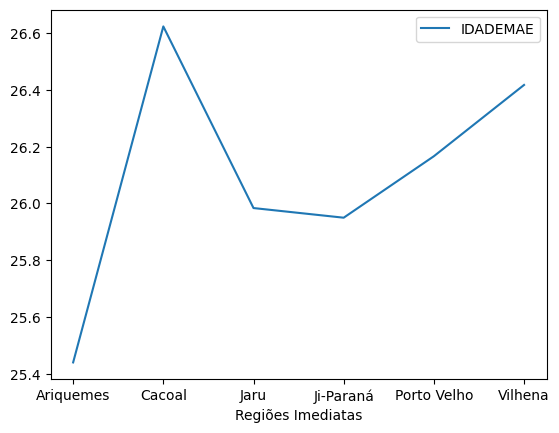

In [18]:
idade_mae.groupby(regioes_imediatas).mean().plot().set_xlabel('Regiões Imediatas')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [47]:
mapping_idh = {
    "Candeias do Jamari": "IDH medio",
    "Guajará-Mirim": "IDH medio",
    "Itapuã do Oeste": "IDH medio",
    "Nova Mamoré": "IDH baixo",
    "Porto Velho": "IDH alto",
    "Ariquemes": "IDH alto",
    "Alto Paraíso": "IDH medio",
    "Buritis": "IDH medio",
    "Cacaulândia": "IDH medio",
    "Campo Novo de Rondônia": "IDH baixo",
    "Cujubim": "IDH medio",
    "Monte Negro": "IDH medio",
    "Rio Crespo": "IDH medio",
    "Jaru": "IDH medio",
    "Governador Jorge Teixeira": "IDH baixo",
    "Machadinho D'Oeste": "IDH baixo",
    "Theobroma": "IDH baixo",
    "Vale do Anari": "IDH baixo",
    "Alvorada D'Oeste": "IDH medio",
    "Costa Marques": "IDH medio",
    "Ji-Paraná": "IDH alto",
    "Mirante da Serra": "IDH medio",
    "Nova União": "IDH baixo",
    "Ouro Preto do Oeste": "IDH medio",
    "Presidente Médici": "IDH medio",
    "São Francisco do Guaporé": "IDH medio",
    "São Miguel do Guaporé": "IDH medio",
    "Seringueiras": "IDH baixo",
    "Teixeirópolis": "IDH medio",
    "Urupá": "IDH medio",
    "Vale do Paraíso": "IDH medio",
    "Cacoal": "IDH alto",
    "Alta Floresta D'Oeste": "IDH medio",
    "Alto Alegre dos Parecis": "IDH baixo",
    "Castanheiras": "IDH medio",
    "Espigão D'Oeste": "IDH medio",
    "Ministro Andreazza": "IDH medio",
    "Nova Brasilândia D'Oeste":"IDH medio",
    "Novo Horizonte do Oeste": "IDH medio",
    "Parecis": "IDH medio",
    "Pimenta Bueno": "IDH alto",
    "Primavera de Rondônia": "IDH medio",
    "Rolim de Moura": "IDH alto",
    "Santa Luzia D'Oeste": "IDH medio",
    "São Felipe D'Oeste": "IDH medio",
    "Vilhena": "IDH alto",
    "Cabixi": "IDH medio",
    "Cerejeiras": "IDH medio",
    "Chupinguaia": "IDH medio",
    "Colorado do Oeste": "IDH medio",
    "Corumbiara": "IDH medio",
    "Pimenteiras do Oeste": "IDH medio"
}

In [42]:
sinasc5 = sinasc_raw[['IDADEMAE','munResNome','IDADEPAI', 'PESO', 'APGAR5','APGAR1','QTDFILMORT','QTDFILVIVO']]
sinasc5.head(3)

,IDADEMAE,munResNome,IDADEPAI,PESO,APGAR5,APGAR1,QTDFILMORT,QTDFILVIVO
0,19,Alta Floresta D'Oeste,26.0,3685,10.0,9.0,0.0,0.0
1,29,Alta Floresta D'Oeste,24.0,3055,9.0,8.0,0.0,1.0
2,37,Alta Floresta D'Oeste,32.0,3460,10.0,8.0,0.0,2.0


In [51]:
index_mun = sinasc5.set_index('munResNome')
idh = index_mun.groupby(mapping_idh).agg(['mean', 'min', 'max'])
idh

IDADEMAE           IDADEPAI                     PESO             \
                 mean min max       mean   min   max         mean  min   max   
munResNome                                                                     
IDH alto    26.280332  12  47  31.074091  15.0  70.0  3245.623791  292  5720   
IDH baixo   25.326944  13  46  30.617450  16.0  58.0  3231.456188  500  5065   
IDH medio   25.884855  11  53  31.207092  16.0  86.0  3240.847592  258  5985   

              APGAR5  ...          APGAR1            QTDFILMORT             \
                mean  ...   max      mean  min   max       mean  min   max   
munResNome            ...                                                    
IDH alto    9.171668  ...  10.0  8.172839  0.0  10.0   0.272297  0.0  28.0   
IDH baixo   9.172527  ...  10.0  8.017014  0.0  10.0   0.249406  0.0   9.0   
IDH medio   9.195668  ...  10.0  8.092265  0.0  10.0   0.258667  0.0   7.0   

           QTDFILVIVO             
                 mean  min   max  
munResNome                        
IDH alto     1.033960  0.0  12.0  
IDH baixo    1.072664  0.0  10.0  
IDH medio    1.088847  0.0  30.0  

[3 rows x 21 columns]

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [25]:
mapping_ifdm = {
  "Ariquemes" : "moderado",
  "Vilhena" : "moderado",
  "Pimenta Bueno" : "moderado",
  "Porto Velho" : "moderado",
  "Ji-Paraná" : "moderado",
  "Cacoal" : "moderado",
  "Santa Luzia d'Oeste" : "moderado",
  "Rolim de Moura" : "moderado",
  "Chupinguaia" : "moderado",
  "São Miguel do Guaporé" : "moderado",
  "Pimenteiras do Oeste" : "moderado",
  "Teixeirópolis" : "moderado",
  "Colorado do Oeste" : "moderado",
  "Jaru" : "moderado",
  "Rio Crespo" : "moderado",
  "Primavera de Rondônia" : "moderado",
  "Alta Floresta d'Oeste" : "moderado",
  "Ouro Preto do Oeste" : "moderado",
  "São Francisco do Guaporé" : "moderado",
  "Candeias do Jamari" : "moderado",
  "Buritis" : "moderado",
  "São Felipe d'Oeste" : "moderado",
  "Presidente Médici" : "moderado",
  "Cerejeiras" : "moderado",
  "Monte Negro" : "moderado",
  "Urupá" : "moderado",
  "Espigão d'Oeste" : "regular",
  "Seringueiras" : "regular",
  "Alvorada d'Oeste" : "regular",
  "Itapuã do Oeste" : "regular",
  "Cabixi" : "regular",
  "Novo Horizonte do Oeste" : "regular",
  "Nova Brasilândia d'Oeste" : "regular",
  "Vale do Paraíso" : "regular",
  "Corumbiara" : "regular",
  "Alto Paraíso" : "regular",
  "Cacaulândia" : "regular",
  "Vale do Anari" : "regular",
  "Ministro Andreazza" : "regular",
  "Costa Marques" : "regular",
  "Nova União" : "regular",
  "Guajará-Mirim" : "regular",
  "Mirante da Serra" : "regular",
  "Parecis" : "regular",
  "Castanheiras" : "regular",
  "Theobroma" : "regular",
  "Machadinho d'Oeste" : "regular",
  "Campo Novo de Rondônia" : "regular",
  "Nova Mamoré" : "regular",
  "Cujubim" : "regular",
  "Alto Alegre dos Parecis" : "regular",
  "Governador Jorge Teixeira" : "regular"

}

In [ ]:
ifdm = index_mun.groupby(mapping_ifdm).agg(['mean', 'min', 'max'])
ifdm

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [35]:
mapping_pib = {
    "Porto Velho" : "Acima de 1 Bi",
    "Ji-Paraná" : "Acima de 1 Bi",
    "Vilhena" : "Acima de 1 Bi",
    "Ariquemes" : "Acima de 1 Bi",
    "Cacoal" : "Acima de 1 Bi",
    "Jaru" : "Acima de 1 Bi",
    "Rolim de Moura" : "Acima de 1 Bi",
    "Pimenta Bueno" : "Acima de 1 Bi",
    "Guajará-Mirim" : "Acima de 500 Mi",
    "Ouro Preto do Oeste" : "Acima de 500 Mi",
    "Buritis" : "Acima de 500 Mi",
    "Machadinho do Oeste" : "Acima de 500 Mi",
    "Espigão d'Oeste" : "Acima de 500 Mi",
    "São Miguel do Guaporé" : "Acima de 500 Mi",
    "Candeias do Jamari" : "Acima de 500 Mi",
    "Nova Mamoré" : "Acima de 500 Mi",
    "Cerejeiras" : "Acima de 500 Mi",
    "Alta Floresta do Oeste" : "Acima de 300 Mi",
    "Presidente Médici" : "Acima de 300 Mi",
    "Cujubim" : "Acima de 300 Mi",
    "Nova Brasilândia do Oeste" : "Acima de 300 Mi",
    "Alto Paraíso" : "Acima de 300 Mi",
    "São Francisco do Guaporé" : "Acima de 300 Mi",
    "Colorado do Oeste" : "Acima de 300 Mi",
    "Monte Negro" : "Acima de 200 Mi",
    "Alto Alegre dos Parecis" : "Acima de 200 Mi",
    "Campo Novo de Rondônia" : "Acima de 200 Mi",
    "Alvorada do Oeste" : "Acima de 200 Mi",
    "Chupinguaia" : "Acima de 100 Mi",
    "Corumbiara" : "Acima de 100 Mi",
    "Ministro Andreazza" : "Acima de 100 Mi",
    "Urupá" : "Acima de 100 Mi",
    "Costa Marques" : "Acima de 100 Mi",
    "Seringueiras" : "Acima de 100 Mi",
    "Mirante da Serra" : "Acima de 100 Mi",
    "Governador Jorge Teixeira" : "Acima de 100 Mi",
    "Theobroma" : "Acima de 100 Mi",
    "Santa Luzia do Oeste" : "Acima de 100 Mi",
    "Novo Horizonte do Oeste" : "Acima de 100 Mi",
    "Itapuã do Oeste" : "Acima de 100 Mi",
    "Vale do Paraíso" : "Acima de 100 Mi",
    "Cacaulândia" : "Acima de 100 Mi",
    "Cabixi" : "Acima de 100 Mi",
    "Vale do Anari" : "Acima de 100 Mi",
    "Nova União" : "Até 100 Mi",
    "Parecis" : "Até 100 Mi",
    "Rio Crespo" : "Até 100 Mi",
    "Pimenteiras do Oeste" : "Até 100 Mi",
    "Teixeirópolis" : "Até 100 Mi",
    "São Felipe do Oeste" : "Até 100 Mi",
    "Castanheiras" : "Até 100 Mi",
    "Primavera de Rondônia" : "Até 100 Mi"

}

In [ ]:
pib = index_mun.groupby(mapping_pib).agg(['mean', 'min', 'max'])
pib

In [54]:
idh.head()

IDADEMAE           IDADEPAI                     PESO             \
                 mean min max       mean   min   max         mean  min   max   
munResNome                                                                     
IDH alto    26.280332  12  47  31.074091  15.0  70.0  3245.623791  292  5720   
IDH baixo   25.326944  13  46  30.617450  16.0  58.0  3231.456188  500  5065   
IDH medio   25.884855  11  53  31.207092  16.0  86.0  3240.847592  258  5985   

              APGAR5  ...          APGAR1            QTDFILMORT             \
                mean  ...   max      mean  min   max       mean  min   max   
munResNome            ...                                                    
IDH alto    9.171668  ...  10.0  8.172839  0.0  10.0   0.272297  0.0  28.0   
IDH baixo   9.172527  ...  10.0  8.017014  0.0  10.0   0.249406  0.0   9.0   
IDH medio   9.195668  ...  10.0  8.092265  0.0  10.0   0.258667  0.0   7.0   

           QTDFILVIVO             
                 mean  min   max  
munResNome                        
IDH alto     1.033960  0.0  12.0  
IDH baixo    1.072664  0.0  10.0  
IDH medio    1.088847  0.0  30.0  

[3 rows x 21 columns]

In [55]:
ifdm.head()

IDADEMAE           IDADEPAI                     PESO             \
                 mean min max       mean   min   max         mean  min   max   
munResNome                                                                     
moderado    26.226921  12  53  31.145206  15.0  70.0  3243.947354  258  5720   
regular     25.412005  11  52  31.345297  16.0  73.0  3255.036835  425  5070   

              APGAR5  ...          APGAR1            QTDFILMORT             \
                mean  ...   max      mean  min   max       mean  min   max   
munResNome            ...                                                    
moderado    9.184522  ...  10.0  8.166159  0.0  10.0   0.272476  0.0  28.0   
regular     9.233004  ...  10.0  8.105263  0.0  10.0   0.264967  0.0   7.0   

           QTDFILVIVO             
                 mean  min   max  
munResNome                        
moderado     1.030350  0.0  12.0  
regular      1.172404  0.0  14.0  

[2 rows x 21 columns]

In [56]:
pib.head()

IDADEMAE           IDADEPAI                     PESO       \
                      mean min max       mean   min   max         mean  min   
munResNome                                                                    
Acima de 1 Bi    26.265562  12  47  31.108387  15.0  70.0  3247.215719  292   
Acima de 100 Mi  25.638424  12  52  31.744348  17.0  73.0  3250.392337  425   
Acima de 200 Mi  25.146435  13  41  30.187500  16.0  55.0  3233.701349  930   
Acima de 300 Mi  25.706070  11  47  30.819149  16.0  64.0  3240.387380  258   
Acima de 500 Mi  25.785927  13  53  31.381955  17.0  60.0  3243.336315  285   

                         APGAR5  ...          APGAR1            QTDFILMORT  \
                  max      mean  ...   max      mean  min   max       mean   
munResNome                       ...                                         
Acima de 1 Bi    5720  9.166223  ...  10.0  8.167346  0.0  10.0   0.270229   
Acima de 100 Mi  4810  9.173984  ...  10.0  8.054743  1.0  10.0   0.239824   
Acima de 200 Mi  4680  9.319846  ...  10.0  8.177264  0.0  10.0   0.263982   
Acima de 300 Mi  4888  9.092000  ...  10.0  7.958466  0.0  10.0   0.251828   
Acima de 500 Mi  5135  9.364374  ...  10.0  8.256603  0.0  10.0   0.319958   

                           QTDFILVIVO             
                 min   max       mean  min   max  
munResNome                                        
Acima de 1 Bi    0.0  28.0   1.026435  0.0  12.0  
Acima de 100 Mi  0.0   6.0   0.992320  0.0  14.0  
Acima de 200 Mi  0.0   4.0   1.010526  0.0   7.0  
Acima de 300 Mi  0.0   5.0   1.062097  0.0   8.0  
Acima de 500 Mi  0.0   7.0   1.228385  0.0  11.0  

[5 rows x 21 columns]

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

**Resposta:**

Relacionando as informações, observei que apesar de ídices positivos como o IDH alto, IFDM moderado e PIB acima de 1 Bi, o número máximo de filhos mortos é o maior em municípios dentro dos parâmetros citados. Contudo, também aprensenta a maior quantidade de filhos vivos.